# Mini-project 1: Deep Q-learning for Epidemic Mitigation

## Imports

In [1]:
"""Environment imports"""
from epidemic_env.agent import Agent
from epidemic_env.dynamics import ModelDynamics
from epidemic_env.env import Env

"""Pytorch and numpy imports"""
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np

#@formatter:off
%matplotlib inline
#@formatter:on

In [8]:
# detect the device (CPU or GPU)
device = 'cpu' # 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
device = torch.device(device)


cpu


In [9]:
def plot_results(total, actions, cities):
    fig = plt.figure(figsize=(14, 10))
    ax_leftstate = plt.subplot2grid(shape=(9, 2), loc=(0, 0), rowspan=4)
    ax_leftobs = plt.subplot2grid(shape=(9, 2), loc=(4, 0), rowspan=3)
    ax_leftactions = plt.subplot2grid(shape=(9, 2), loc=(7, 0), rowspan=2)
    ax_right = [plt.subplot2grid(shape=(9, 2), loc=(0, 1), colspan=1)]
    ax_right += [plt.subplot2grid(shape=(9, 2), loc=(i, 1), colspan=1) for i in range(1, 9)]
    ax_right = {k: ax_right[_id] for _id, k in enumerate(cities.keys())}

    [ax_leftstate.plot(y) for y in total.values()]
    ax_leftstate.legend(total.keys())
    ax_leftstate.set_title('Full state')
    ax_leftstate.set_ylabel('number of people in each state')

    [ax_leftobs.plot(total[y]) for y in ['infected', 'dead']]
    ax_leftobs.legend(['infected', 'dead'])
    ax_leftobs.set_title('Observable state')
    ax_leftobs.set_ylabel('number of people in each state')

    ax_leftactions.imshow(np.array([v for v in actions.values()]).astype(np.uint8), aspect='auto')
    ax_leftactions.set_title('Actions')
    ax_leftactions.set_yticks([0, 1, 2, 3])
    ax_leftactions.set_yticklabels(list(actions.keys()))
    ax_leftactions.set_xlabel('time (in weeks)')

    [ax.plot(cities[c]['infected']) for c, ax in ax_right.items()]
    [ax.plot(cities[c]['dead']) for c, ax in ax_right.items()]
    [ax.set_ylabel(c) for c, ax in ax_right.items()]
    [ax.xaxis.set_major_locator(plt.NullLocator()) for c, ax in ax_right.items()]
    # ax_right['Zürich'].set_xlabel('time (in weeks)')
    # ax_right['Zürich'].xaxis.set_major_locator(MultipleLocator(2.000))

    fig.tight_layout()
    plt.show()

In [10]:
def parse_infos(infos_list):
    """ Parse the logs """
    total = {p: np.array([getattr(l.total, p) for l in infos_list]) for p in dyn.parameters}
    cities = {c: {p: np.array([getattr(l.city[c], p) for l in infos_list]) for p in dyn.parameters} for c in dyn.cities}
    actions = {a: np.array([l.action[a] for l in infos_list]) for a in infos_list[0].action.keys()}

    return total, actions, cities

## Question 1

In [13]:
dyn = ModelDynamics('config/switzerland.yaml')
env = Env(dyn,  # We pass the dynamical model to the environment
          action_space=None,  # Here one could pass an openai gym action space that can then be sampled
          observation_space=None,  # Here one could pass an openai gym obs space that can then be sampled
          )
obs, info = env.reset(seed=0)
reward = 0

In [14]:
class BasicPolicy(Agent):
    def __init__(self):
        pass

    def load_model(self, savepath: str):
        pass

    def optimize_model(self) -> float:
        pass

    def save_model(self, savepath: str):
        pass

    def reset(self):
        pass

    def act(self, obs, reward):
        return {
            'confinement': False,
            'isolation': False,
            'hospital': False,
            'vaccinate': False,
        }

In [15]:
""" Run basic simulation (no actions) """
infos_list = []
policy = BasicPolicy()
for i in range(30):
    action = policy.act(obs, reward)
    obs, reward, done, info = env.step(action)
    infos_list.append(info)

In [16]:
total, actions, cities = parse_infos(infos_list)

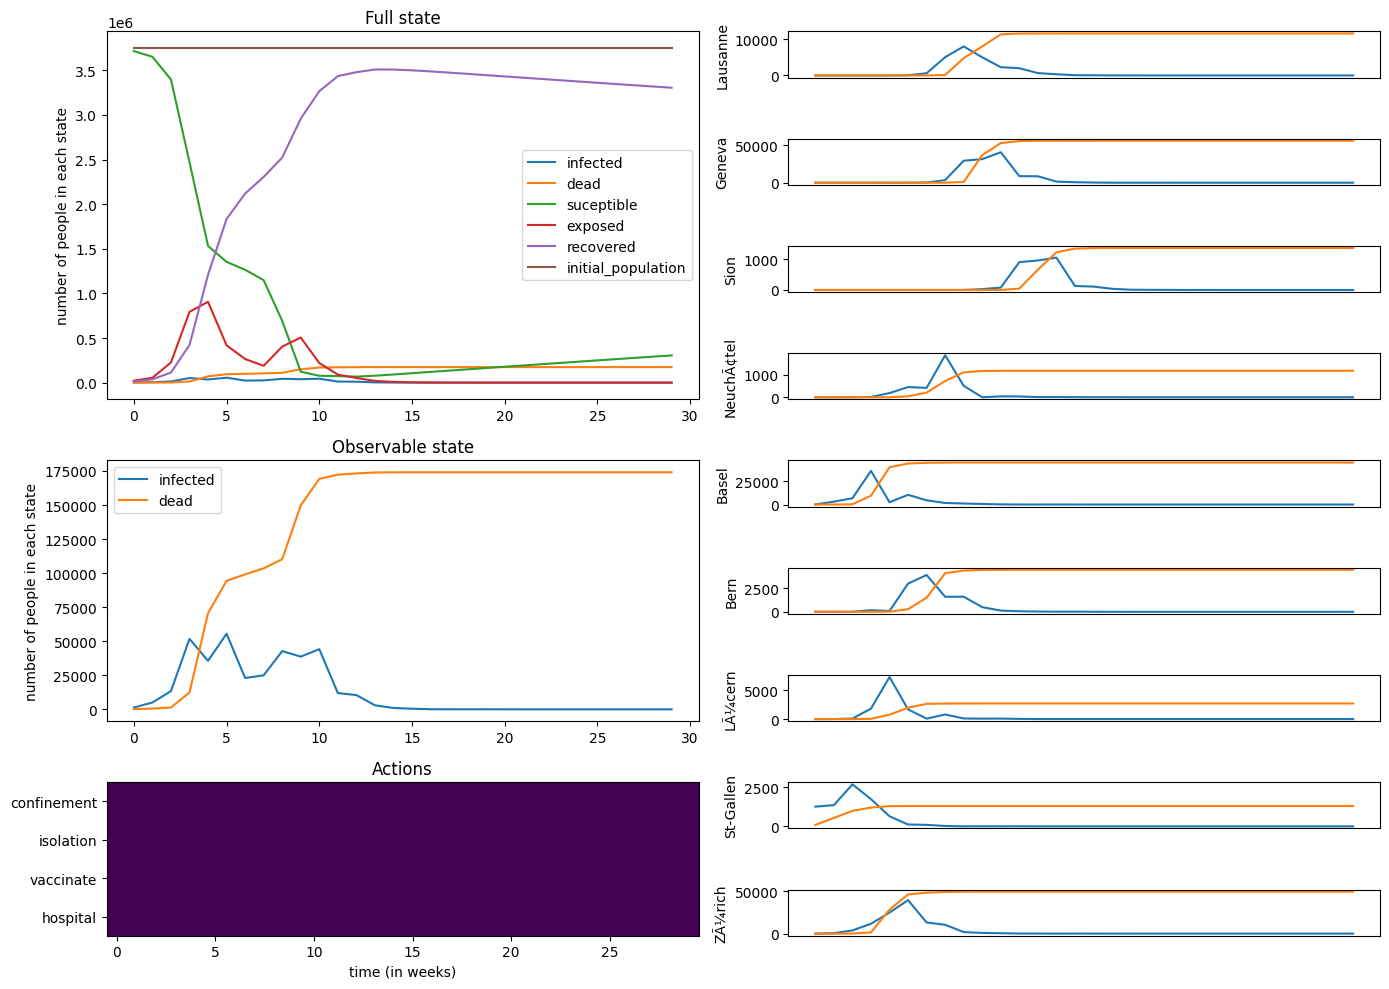

In [17]:
plot_results(total, actions, cities)

### Question 1.a).1

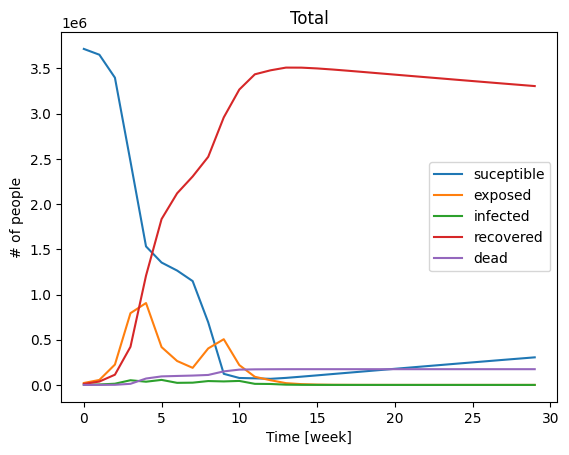

In [18]:
plt.plot(total['suceptible'], label='suceptible')
plt.plot(total['exposed'], label='exposed')
plt.plot(total['infected'], label='infected')
plt.plot(total['recovered'], label='recovered')
plt.plot(total['dead'], label='dead')
plt.xlabel('Time [week]')
plt.ylabel('# of people')
plt.title('Total')
plt.legend()
plt.show()

### Question 1.a).2

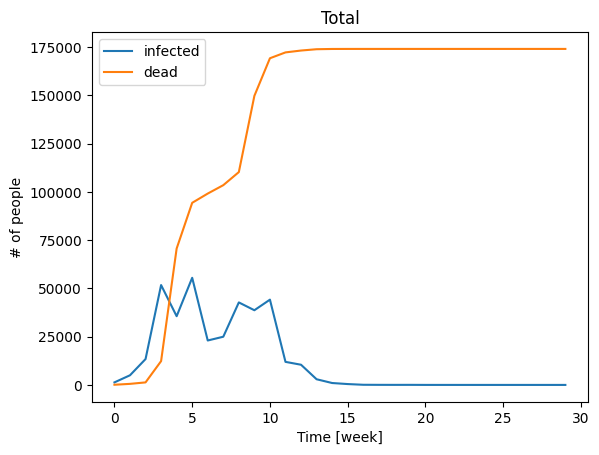

In [19]:
plt.plot(total['infected'], label='infected')
plt.plot(total['dead'], label='dead')
plt.xlabel('Time [week]')
plt.ylabel('# of people')
plt.title('Total')
plt.legend()
plt.show()

### Question 1.a).3

Text(0.02, 0.5, '# of people')

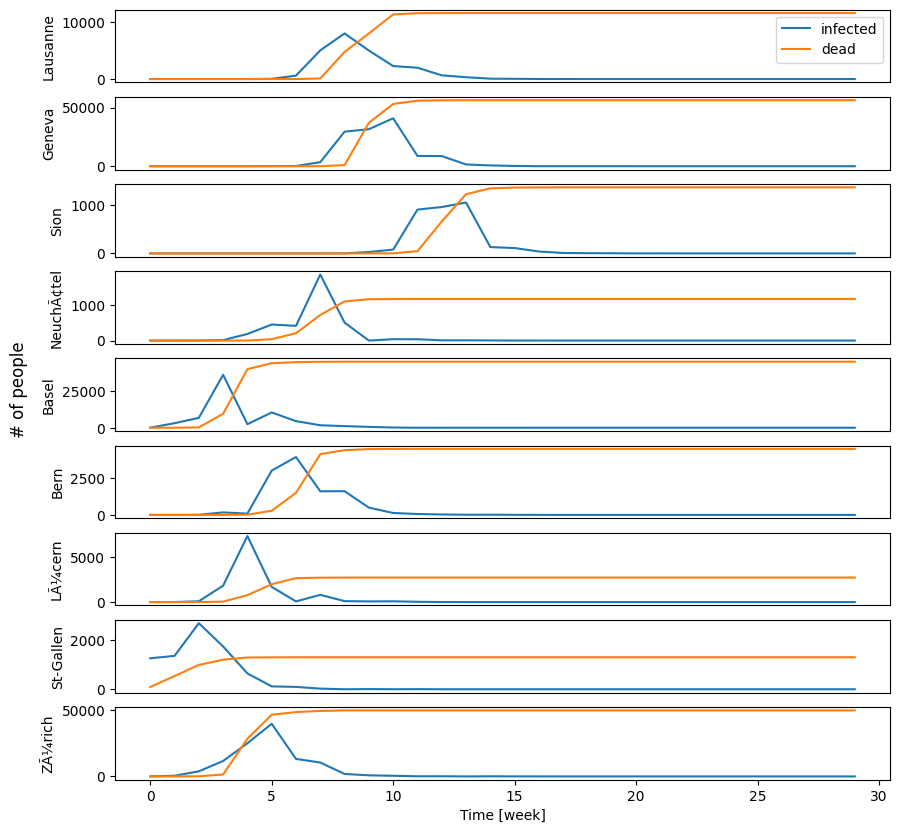

In [20]:
fig, ax = plt.subplots(nrows=9, ncols=1, figsize=(10, 10))
for i, c in enumerate(cities.keys()):
    ax[i].plot(cities[c]['infected'], label='infected')
    ax[i].plot(cities[c]['dead'], label='dead')
    ax[i].set_ylabel(c)
    if i < 8:
        ax[i].xaxis.set_major_locator(plt.NullLocator())

ax[0].legend()
plt.xlabel("Time [week]")
fig.supylabel("# of people")

### Discuss the evolution of the variables over time.
TODO

## Question 2 a)

In [21]:
class RussoPolicy(Agent):
    def __init__(self):
        self.total_infected = 0
        self.confinment_remaining = 0

    def load_model(self, savepath: str):
        pass

    def optimize_model(self) -> float:
        pass

    def save_model(self, savepath: str):
        pass

    def reset(self):
        self.total_infected = 0
        self.confinment_remaining = 0

    def act(self, obs, reward):
        self.total_infected = sum(obs.total.infected)
        confinment = False

        if self.total_infected > 20000 and self.confinment_remaining == 0:
            confinment = True
            self.confinment_remaining = 4
        elif self.confinment_remaining > 0:
            confinment = True
            self.confinment_remaining -= 1

        return {
            'confinement': confinment,
            'isolation': False,
            'hospital': False,
            'vaccinate': False,
        }

In [22]:
dyn = ModelDynamics('config/switzerland.yaml')
env = Env(dyn,  # We pass the dynamical model to the environment
          action_space=None,  # Here one could pass an openai gym action space that can then be sampled
          observation_space=None,  # Here one could pass an openai gym obs space that can then be sampled
          )
obs, info = env.reset(seed=0)
action = None
infos_list = []
policy = RussoPolicy()
actions = []
reward = [[0]]
for i in range(30):
    action = policy.act(obs, reward[0][0])
    actions.append(action['confinement'])
    obs, reward, done, info = env.step(action)
    infos_list.append(info)

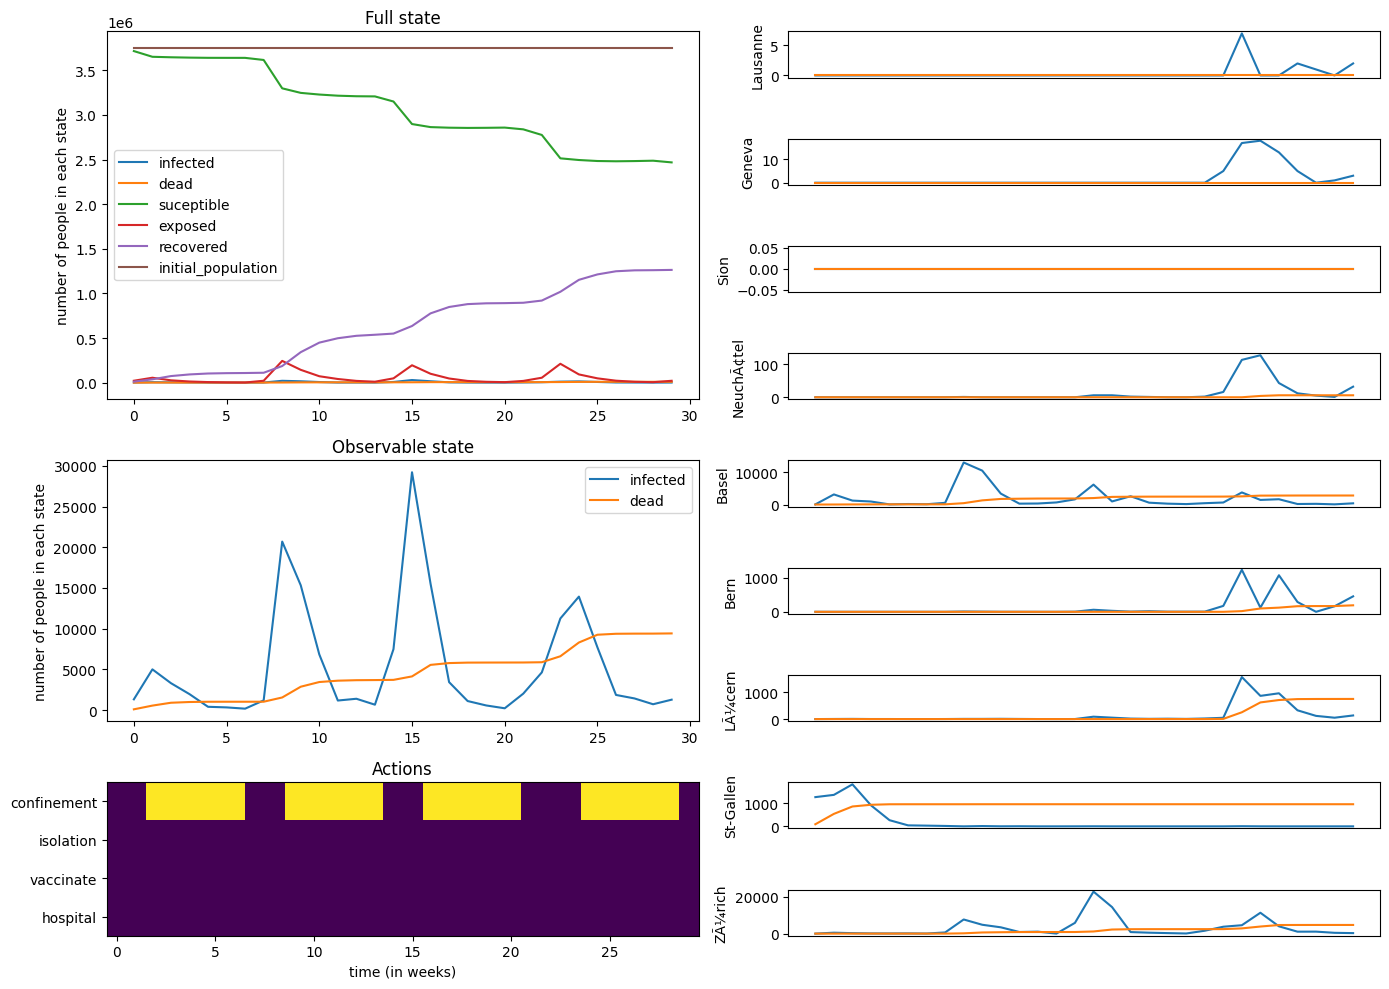

In [23]:
total_russo, actions_russo, cities_russo = parse_infos(infos_list)
plot_results(total_russo, actions_russo, cities_russo)

### 1

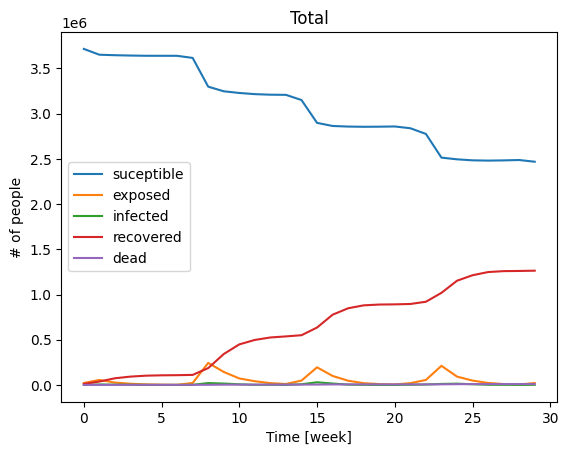

In [24]:
totals = [info.total for info in infos_list]
suceptibles = [total.suceptible for total in totals]
exposeds = [total.exposed for total in totals]
infected = [total.infected for total in totals]
recovereds = [total.recovered for total in totals]
deads = [total.dead for total in totals]

plt.plot(suceptibles, label='suceptible')
plt.plot(exposeds, label='exposed')
plt.plot(infected, label='infected')
plt.plot(recovereds, label='recovered')
plt.plot(deads, label='dead')
plt.xlabel('Time [week]')
plt.ylabel('# of people')
plt.title('Total')
plt.legend()
plt.show()

### 2

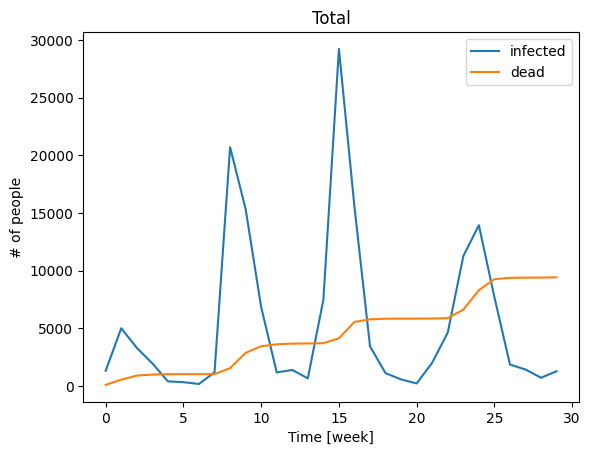

In [25]:
plt.plot(infected, label='infected')
plt.plot(deads, label='dead')
plt.xlabel('Time [week]')
plt.ylabel('# of people')
plt.title('Total')
plt.legend()
plt.show()

### 3

Text(0.02, 0.5, '# of people')

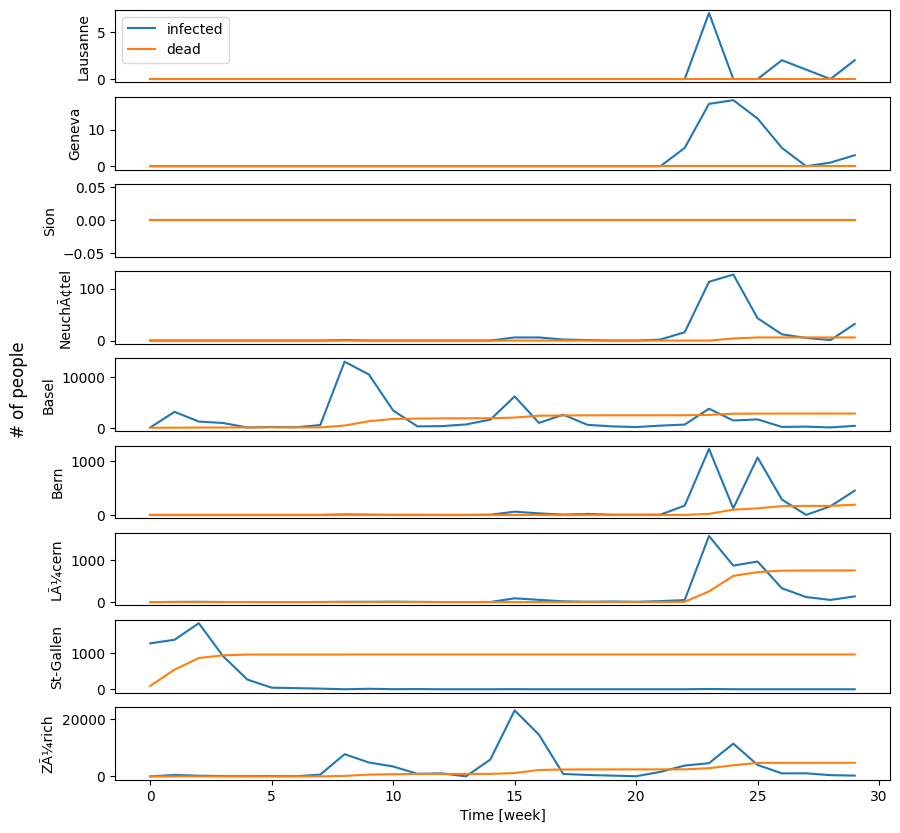

In [26]:
fig, ax = plt.subplots(nrows=9, ncols=1, figsize=(10, 10))
for i, c in enumerate(cities_russo.keys()):
    ax[i].plot(cities_russo[c]['infected'], label='infected')
    ax[i].plot(cities_russo[c]['dead'], label='dead')
    ax[i].set_ylabel(c)
    if i < 8:
        ax[i].xaxis.set_major_locator(plt.NullLocator())

ax[0].legend()
plt.xlabel("Time [week]")
fig.supylabel("# of people")

### 4

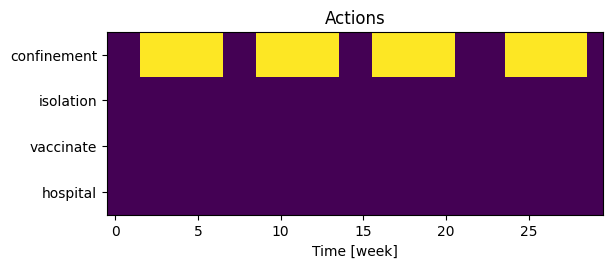

In [27]:
ax_actions = plt.subplot2grid(shape=(18, 1), loc=(0, 0), colspan=1, rowspan=9)
ax_actions.imshow(np.array([v for v in actions_russo.values()]).astype(np.uint8), aspect='auto')
ax_actions.set_title('Actions')
ax_actions.set_yticks([0, 1, 2, 3])
ax_actions.set_yticklabels(list(actions_russo.keys()))
ax_actions.set_xlabel('Time [week]')
plt.show()

## Question 2 b)

In [28]:
def run_episode(policy: Agent, env: Env, weeks: int = 30, seed: int = 0) -> (list, list, ...):
    # We pass a seed to the env to ensure reproductibility
    obs, info = env.reset(seed=seed)
    policy.reset()
    cumulative_reward = 0
    action_list, obs_list, reward_list = [], [], []
    reward = torch.tensor([[0]])
    for i in range(weeks):
        action = policy.act(obs, reward)
        obs, reward, done, info = env.step(action)
        cumulative_reward = reward + cumulative_reward
        action_list.append(action)
        obs_list.append(obs)
        reward_list.append(reward)
    return action_list, obs_list, cumulative_reward

In [29]:
def evaluate_policy(policy: Agent, env: Env, iterations: int = 50) -> (list, list, list):
    number_of_confined_days_list = []
    cumulative_reward_list = []
    number_of_total_deaths_list = []

    for i in range(iterations):
        # action_list, observation_list
        action_list, obs_list, cumulative_reward = run_episode(policy, env, weeks=30, seed=0)

        # get number of days confined
        number_of_confined_days = np.sum([7 if action['confinement'] else 0 for action in action_list])

        # get last observation and sum dead
        number_of_deaths = np.sum(obs_list[-1].total.dead)

        # append to lists
        cumulative_reward_list.append(cumulative_reward)
        number_of_confined_days_list.append(number_of_confined_days)
        number_of_total_deaths_list.append(number_of_deaths)

    cumulative_reward_list = [tensor[0, 0] for tensor in cumulative_reward_list]
    return number_of_confined_days_list, cumulative_reward_list, number_of_total_deaths_list

In [30]:
number_of_confined_days_list, cumulative_reward_list, number_of_total_deaths_list = evaluate_policy(RussoPolicy(), env)

In [31]:
def plot_histogram(number_of_confined_days_list: list, cumulative_reward_list: str, number_of_total_deaths_list: list):
    number_of_confined_days_array = np.array(number_of_confined_days_list, dtype=float).reshape((-1, 1))
    cumulative_reward_array = np.array(cumulative_reward_list, dtype=float).reshape((-1, 1))
    number_of_total_deaths_array = np.array(number_of_total_deaths_list, dtype=float).reshape((-1, 1))

    """ Plot results """
    fig, ax = plt.subplots(3, 1, figsize=(18, 8))

    def hist_avg(ax, data, title):
        ymax = 50
        if title == 'deaths':
            x_range = (1000, 200000)
            title = '# of total deaths'
        elif title == 'cumulative rewards':
            x_range = (-300, 300)
            title = 'Cumulative rewards'
        elif 'days' in title:
            x_range = (0, 200)
            title = '# of confined days'
        else:
            raise ValueError(f'{title} is not a valid title')
        ax.set_title(title)
        ax.set_ylim(0, ymax)
        ax.set_ylabel('Number of episodes')
        ax.vlines([np.mean(data)], 0, ymax, color='red')
        ax.hist(data, bins=60, range=x_range)

    hist_avg(ax[0], number_of_total_deaths_array, 'deaths')
    hist_avg(ax[1], cumulative_reward_array, 'cumulative rewards')
    hist_avg(ax[2], number_of_confined_days_array, 'confined days')
    fig.tight_layout()
    plt.show()

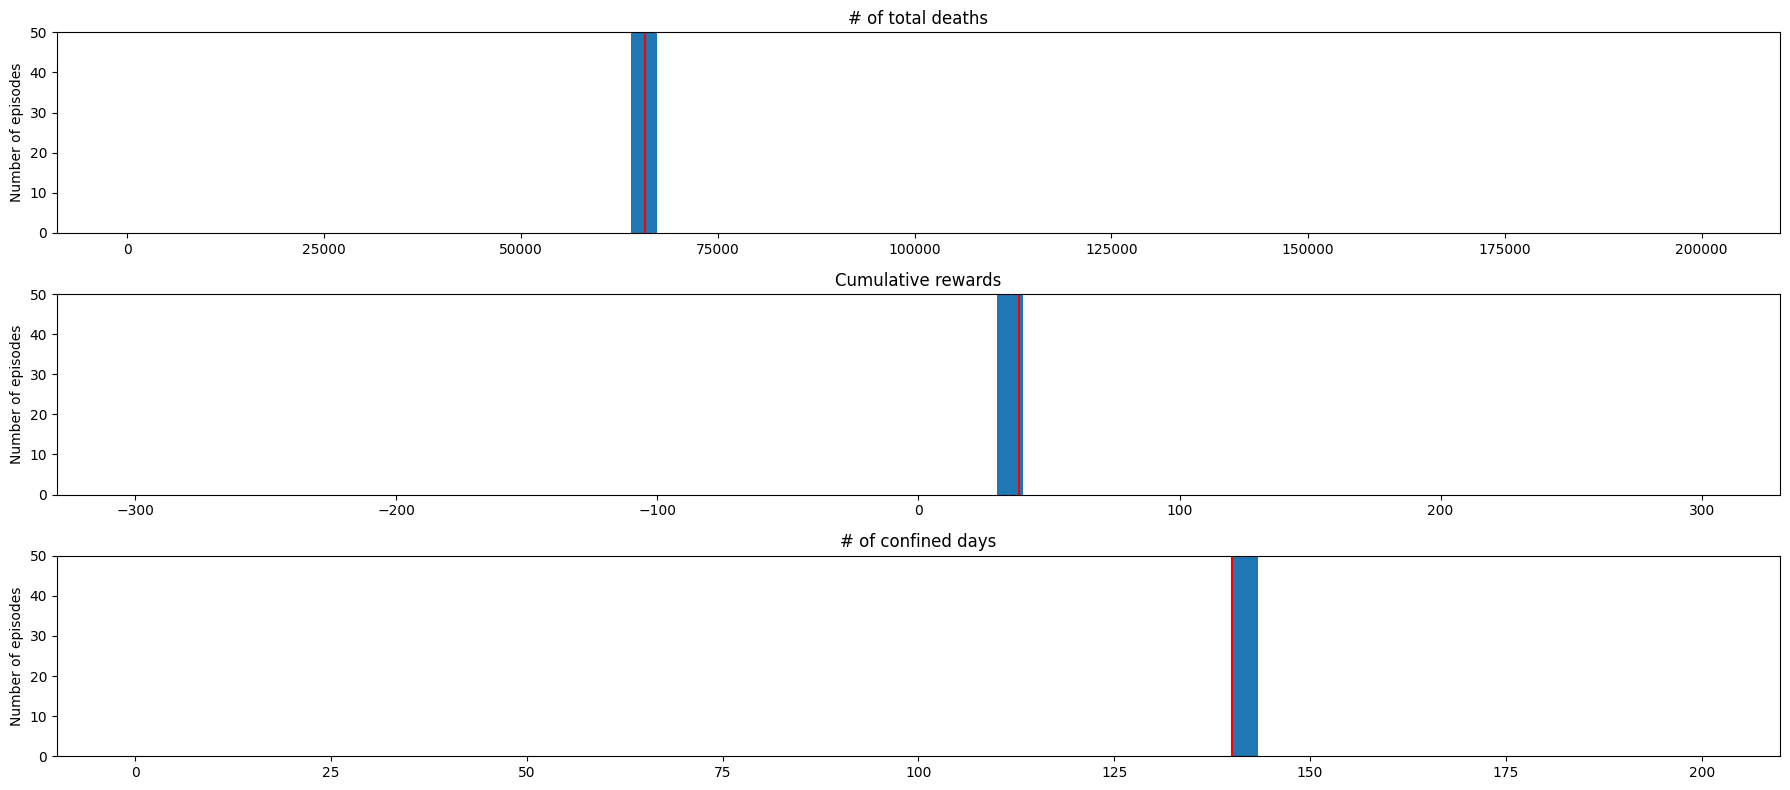

In [32]:
plot_histogram(number_of_confined_days_list, cumulative_reward_list, number_of_total_deaths_list)

## Question 3

In [33]:
# For each deep-learning policy that you train in this project we recommend that you use the following
# hyperparameters. If you wish so, you are free to test other values, but as searching through the hyperparameterspace can be quite a tedious experience we are giving you values that we know will allow the algorithm to converge
# to a good policy
def create_model(input_dim: int, output_dim: int, activation: nn.Module = nn.ReLU()):
    return nn.Sequential(
        nn.Linear(input_dim, 64),
        activation,
        nn.Linear(64, 32),
        activation,
        nn.Linear(32, 16),
        activation,
        nn.Linear(16, output_dim)
    ).to(device)

In [34]:
# Note unless special measures are taken, the training of neural networks is non-deterministic in most deeplearning libraries. To ensure that your results are reproducible you will thus need to seed not only the environment but also your deep-learning library. Refer to the jupyter tutorial notebook for instructions.
torch.manual_seed(0)
torch.use_deterministic_algorithms(True)

In [35]:
from epidemic_env.dynamics import Observation


def observation2tensor(obs: Observation):
    """
    Convert an Observation object to a torch tensor so it can be used to feed a nn
    """
    # 9 cities, 2 for dead/infected, 7=|city.dead| days per week
    # -> 2*7*9 sized vector
    total_population = sum(obs.pop.values())
    obs = torch.tensor([x for city in obs.city.values() for x in city.dead + city.infected]).float()

    # scale the observation and apply ^1/4 to avoid tiny values
    obs = (obs / total_population) ** .25
    return obs.to(device)


observation2tensor(obs)

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0227, 0.0270, 0.0270, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0270, 0.0356, 0.0299, 0.0370, 0.0321,
        0.0299, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0356, 0.0356, 0.0356,
        0.0356, 0.0356, 0.0356, 0.0356, 0.0299, 0.0394, 0.0382, 0.0382, 0.0356,
        0.0270, 0.0540, 0.1651, 0.1651, 0.1651, 0.1651, 0.1651, 0.1651, 0.1651,
        0.0592, 0.0733, 0.0734, 0.0907, 0.0886, 0.1052, 0.1000, 0.0818, 0.0818,
        0.0819, 0.0821, 0.0829, 0.0836, 0.0844, 0.0843, 0.0769, 0.0986, 0.1131,
        0.1229, 0.1334, 0.1048, 0.1189, 0.1189, 0.1189, 0.1189, 0.1189, 0.1189,
        0.1189, 0.0523, 0.0571, 0.0638, 0.0627, 0.0432, 0.0733, 0.0775, 0.1265,
        0.1265, 0.1265, 0.1265, 0.1265, 0.1265, 0.1265, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

### Question 3.a)

In [36]:
epsilon = .7

In [40]:

class AgentDQN(Agent):
    """
    Implemented by following this tutorial : https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html
    """

    def __init__(self, *args, **kwargs):
        options = kwargs.get('options', {})

        # set the seed for reproducibility
        torch.manual_seed(options.get('seed', 0))
        torch.use_deterministic_algorithms(True)

        self.update_episode = options.get('update_episode', 5)
        self.learning_rate = options.get('learning_rate', 5e-3)
        self.discount_factor = options.get('discount_factor', .9)
        self.buffer_size = options.get('buffer_size', 2e4)
        self.batch_size = options.get('batch_size', 2048)
        self.epsilon = options.get('epsilon', .7)

        self.episode = 0
        self.buffer = []  # contains (states, actions, next_state, reward) tuples
        self.last_obs, self.last_action, self.last_reward = None, None, None

        in_dim, out_dim = 2 * 9 * 7, 2
        self.Q_network = create_model(in_dim, out_dim, nn.ReLU())
        self.Q_target_network = create_model(in_dim, out_dim, nn.ReLU())
        self.optimizer = torch.optim.AdamW(self.Q_network.parameters(), lr=self.learning_rate, amsgrad=True)

        self.best_eval_reward = -float('inf')  # for model saving

    def load_model(self, savepath: str):
        self.Q_network.load_state_dict(torch.load(savepath))
        # load the target network with the same weights
        self.Q_target_network.load_state_dict(self.Q_network.state_dict())

    def optimize_model(self) -> float:
        if len(self.buffer) < self.batch_size:
            return 0
        transitions = torch.randperm(len(self.buffer))[:self.batch_size]
        transitions = [self.buffer[i] for i in transitions]
        state_batch, action_batch, next_state_batch, reward_batch = zip(*transitions)
        state_batch, reward_batch = map(torch.stack, (state_batch, reward_batch))
        state_batch = state_batch.to(device)
        reward_batch = reward_batch.reshape((-1, 1)).to(device)  # reshape to (batch_size, 1)

        next_state_batch = [obs for obs in next_state_batch if obs is not None]

        # Compute Q(s_t, a) - the model computes Q(s_t), then we select the columns of actions taken.
        state_action_values = self.Q_network(state_batch)

        # Compute V(s_{t+1}) for all next states.
        next_state_values = torch.zeros(self.batch_size, device=device)
        with torch.no_grad():
            if len(next_state_batch) > 0:
                non_final_mask = torch.tensor(tuple(map(lambda t: t[2] is not None, transitions)), device=device,
                                              dtype=torch.bool)
                next_state_batch = torch.stack(next_state_batch).to(device)
                next_state_values[non_final_mask] = self.Q_target_network(next_state_batch).max(1)[0]

        next_state_values = next_state_values.reshape((-1, 1))

        # Compute the expected Q values
        expected_state_action_values = (next_state_values * self.discount_factor) + reward_batch

        # Compute Huber loss
        criterion = nn.SmoothL1Loss()
        loss = criterion(state_action_values, expected_state_action_values)

        # Optimize the model
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # update the target network every update_episode steps
        if self.episode % self.update_episode == 0:
            self.Q_target_network.load_state_dict(self.Q_network.state_dict())

        # do not do in place gradient clipping
        return loss.item()

    def save_model(self, savepath: str):
        torch.save(self.Q_network.state_dict(), savepath)

    def reset(self):
        """
        Called at the beginning of each episode
        """
        if self.last_reward is not None:
            self.buffer.append((self.last_obs, self.last_action, None, self.last_reward))
        self.last_reward = None
        self.last_obs = None
        self.last_action = None
        self.episode += 1

    def act(self, obs, reward):
        # cast the observation
        obs = observation2tensor(obs)
        # get the next action
        # epsilon-greedy policy
        if torch.rand(1) < self.epsilon:
            action = torch.rand(2)
        else:
            with torch.no_grad():
                action = self.Q_network(obs)

        if self.last_obs is not None and self.last_action is not None:
            # store the transition
            action = torch.eye(2)[torch.argmax(action)]
            self.buffer.append((self.last_obs, self.last_action, obs, reward))

        self.last_action = action
        self.last_obs = obs
        self.last_reward = reward
        if len(self.buffer) > self.buffer_size:
            self.buffer.pop(0)
        # return next action
        return {
            'confinement': bool(torch.argmax(action)),
            'isolation': False,
            'hospital': False,
            'vaccinate': False,
        }

In [41]:
def train(policy: Agent, env: Env, iterations: int):
    eval_trace, training_trace, loss_trace = [], [], []

    for i in range(iterations):
        # Run an episode.
        action_list, obs_list, cumulated_reward = run_episode(policy, env, weeks=30, seed=i)

        # Log the cumuative reward to training trace
        training_trace.append(cumulated_reward.item())

        # run a training step :
        loss_trace.append(policy.optimize_model())

        if (i + 1) % 50 == 0:
            # Evaluate the current policy with epsilon set to 0 (pure exploitation).
            old_epsilon = policy.epsilon
            policy.epsilon = 0
            _, cumulated_reward_list, _ = evaluate_policy(policy, env, 20)
            policy.epsilon = old_epsilon

            # Compute the average cumulative reward over the 20 evaluation episodes and log it to eval trace.
            #average_cumulated_reward = sum(cumulated_reward) / len(cumulated_reward_list)
            average_cumulated_reward = sum(cumulated_reward_list) / len(cumulated_reward_list)
            eval_trace.append(average_cumulated_reward.item())

            """
            This shit is not asked
            # saving the model if it performs better
            if average_cumulated_reward > policy.best_eval_reward:
                policy.save_model('models/best_model_1.pt')
                policy.best_eval_reward = average_cumulated_reward"""

            # print the average cumulative reward
            print(f'Checkpoint {i // 50 + 1} : average cumulated reward = {average_cumulated_reward}')

    return eval_trace, training_trace, loss_trace

In [ ]:
options = {
    "seed": 0,
    "update_episodes": 5,  # target update rate : (fully) update the target network every 5 episodes
    "learning_rate": 5e-3,  # learning rate : 5 · 10−3 (when the action-space is binary)
    "discount_factor": .9,
    "buffer_size": 2e4,
    "batch_size": 2048,
    "epsilon": .7,
}

agentDQN1 = AgentDQN(options)
iterations = 500
eval_trace, training_trace, loss_trace = train(agentDQN1, env, iterations=iterations)

Checkpoint 1 : average cumulated reward = -343.07867431640625


C:\Users\Romain\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:928: UserWarning: Using a target size (torch.Size([2048, 1])) that is different to the input size (torch.Size([2048, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)


In [ ]:
# save the model
agentDQN1.save_model('models/agentDQN_no_decreasing_exploration.pt')

In [ ]:
plt.scatter(range(iterations), training_trace, label='training trace')
plt.plot(range(50, iterations + 1, 50), eval_trace, label='eval trace', color='red')
plt.xlabel('episode')
plt.ylabel('cumulative reward')
plt.legend()
plt.show()

plt.plot(loss_trace)
plt.xlabel('episode')
plt.ylabel('loss')
plt.show()

In [ ]:
number_of_confined_days, cumulative_reward, number_of_total_deaths = evaluate_policy(agentDQN1, env)

In [ ]:
plot_histogram(number_of_confined_days, cumulative_reward, number_of_total_deaths)

In [ ]:
obs, reward = env.reset()
infos_list = []

agentDQN1.reset()
for i in range(30):
    obs, reward, done, info = env.step(agentDQN1.act(obs, reward))
    infos_list.append(info)

In [ ]:
plot_results(*parse_infos(infos_list))

### Question 3.b)

In [ ]:
def train_decreasing_exploration(policy: Agent, env: Env, iterations: int, eps_0: float, eps_min: float):
    """
    redefine the train function to update epsilon at each iteration
    """
    eval_trace, training_trace, loss_trace = [], [], []

    for i in range(iterations):
        # update epsilon
        policy.epsilon = max(eps_0 * (iterations - i) / iterations, eps_min)

        # Run an episode.
        action_list, obs_list, cumulated_reward = run_episode(policy, env)

        # Log the cumuative reward to training trace
        training_trace.append(cumulated_reward.item())

        # run a training step :
        loss_trace.append(policy.optimize_model())

        if (i + 1) % 50 == 0:
            old_epsilon = policy.epsilon
            policy.epsilon = 0
            _, cumulated_reward_list, _ = evaluate_policy(policy, env, 20)
            policy.epsilon = old_epsilon

            # Compute the average cumulative reward over the 20 evaluation episodes and log it to eval trace.
            average_cumulated_reward = (sum(cumulated_reward_list) / len(cumulated_reward_list)).item()
            eval_trace.append(average_cumulated_reward)

            # print the average cumulative reward
            print(f'Checkpoint {i // 50 + 1} : average cumulated reward = {average_cumulated_reward}')

            """
            This shit is not asked
            # saving the model if it performs better
            if average_cumulated_reward > policy.best_eval_reward:
                policy.save_model('models/best_model_2.pth')
                policy.best_eval_reward = average_cumulated_reward"""

    return eval_trace, training_trace, loss_trace

In [ ]:
agentDQN2 = AgentDQN()
eval_trace2, training_trace2, loss_trace2 = train_decreasing_exploration(agentDQN2, env, iterations=500, eps_0=.7,
                                                                         eps_min=.2)

In [ ]:
# save the model
agentDQN2.save_model('models/agentDQN_decreasing_exploration.pth')

In [ ]:
plt.scatter(range(iterations), training_trace2, label='training trace')
plt.plot(range(50, iterations + 1, 50), eval_trace2, label='eval trace', color='red')
plt.xlabel('episode')
plt.ylabel('cumulative reward')
plt.legend()
plt.show()

plt.plot(loss_trace2)
plt.xlabel('episode')
plt.ylabel('loss')
plt.show()

In [ ]:
agentDQN2.reset()
number_of_confined_days, cumulative_reward, number_of_total_deaths = evaluate_policy(agentDQN2, env)

In [ ]:
plot_histogram(number_of_confined_days, cumulative_reward, number_of_total_deaths)

In [ ]:
obs, reward = env.reset()
infos_list = []

agentDQN2.reset()
for i in range(30):
    obs, reward, done, info = env.step(agentDQN2.act(obs, reward))
    infos_list.append(info)

In [ ]:
plot_results(*parse_infos(infos_list))

### Question 3.c)

In [ ]:
for (agent, title) in [(agentDQN1, 'No decreasing exploration'), (agentDQN2, 'With decreasing exploration')]:
    number_of_confined_days_list, cumulative_reward_list, number_of_total_deaths_list = evaluate_policy(agent, env)
    number_of_confined_days_array = np.array(number_of_confined_days_list, dtype=float).reshape((-1, 1))
    cumulative_reward_array = np.array(cumulative_reward_list, dtype=float).reshape((-1, 1))
    number_of_total_deaths_array = np.array(number_of_total_deaths_list, dtype=float).reshape((-1, 1))
    fig, ax = plt.subplots(3, 1)
    hist_avg(ax[0], number_of_total_deaths_array, 'deaths')
    hist_avg(ax[1], number_of_confined_days_array, 'confinement days')
    hist_avg(ax[2], cumulative_reward_array, 'cumulative rewards')
    fig.tight_layout()
    print(title)
    plt.show()

## Question 4

## Question 4.1)

### Question 4.1.b)

In [ ]:

class AgentDQNToggleAction(Agent):
    """
    Implemented by following this tutorial : https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html
    """
    confinement = False
    vaccinate = False
    isolation = False
    hospital = False

    def __init__(self, seed=0, *args, **kwargs):
        options = kwargs.get('options', {})

        # set the seed for reproducibility
        torch.manual_seed(options.get('seed', seed))
        torch.use_deterministic_algorithms(True)

        self.update_episode = options.get('update_episode', 5)
        self.learning_rate = options.get('learning_rate', 5e-3)
        self.discount_factor = options.get('discount_factor', .9)
        self.buffer_size = options.get('buffer_size', 2e4)
        self.batch_size = options.get('batch_size', 2048)
        self.epsilon = options.get('epsilon', .7)

        self.episode = 0
        self.buffer = []  # contains (states, actions, next_state, reward) tuples
        self.last_obs, self.last_action = None, None

        in_dim, out_dim = 2 * 9 * 7, 5
        self.Q_network = create_model(in_dim, out_dim, nn.ReLU())
        self.Q_target_network = create_model(in_dim, out_dim, nn.ReLU())
        self.optimizer = torch.optim.AdamW(self.Q_network.parameters(), lr=self.learning_rate, amsgrad=True)

        self.best_eval_reward = -float('inf')  # for model saving

    def load_model(self, savepath: str):
        self.Q_network.load_state_dict(torch.load(savepath))
        # load the target network with the same weights
        self.Q_target_network.load_state_dict(self.Q_network.state_dict())

    def optimize_model(self) -> float:
        if len(self.buffer) < self.batch_size:
            return 0
        transitions = torch.randperm(len(self.buffer))[:self.batch_size]
        transitions = [self.buffer[i] for i in transitions]
        state_batch, action_batch, next_state_batch, reward_batch = zip(*transitions)
        state_batch, next_state_batch, reward_batch = map(torch.stack, (state_batch, next_state_batch, reward_batch))
        state_batch = state_batch.to(device)
        reward_batch = reward_batch.reshape((-1, 1)).to(device)  # reshape to (batch_size, 1)
        next_state_batch = next_state_batch.to(device)

        # Compute Q(s_t, a) - the model computes Q(s_t), then we select the columns of actions taken.
        state_action_values = self.Q_network(state_batch)

        # Compute V(s_{t+1}) for all next states.
        with torch.no_grad():
            next_state_values = self.Q_target_network(next_state_batch)

        # Compute the expected Q values
        expected_state_action_values = (next_state_values * self.discount_factor) + reward_batch

        # Compute Huber loss
        criterion = nn.SmoothL1Loss()
        loss = criterion(state_action_values, expected_state_action_values)

        # Optimize the model
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # update the target network every update_episode steps
        if self.episode % self.update_episode == 0:
            self.Q_target_network.load_state_dict(self.Q_network.state_dict())

        # do not do in place gradient clipping
        return loss.item()

    def save_model(self, savepath: str):
        torch.save(self.Q_network.state_dict(), savepath)

    def reset(self):
        """
        Called at the beginning of each episode
        """
        self.last_obs = None
        self.last_action = None
        self.episode += 1

    def act(self, obs, reward):
        # cast the observation
        obs = observation2tensor(obs)
        # get the next action
        # epsilon-greedy policy
        if torch.rand(1) < self.epsilon:
            action = torch.rand(5)
        else:
            with torch.no_grad():
                action = self.Q_network(obs)

        if self.last_obs is not None and self.last_action is not None:
            # store the transition
            action = torch.eye(5)[torch.argmax(action)]
            self.buffer.append((self.last_obs, self.last_action, obs, reward))

        self.last_action = action
        self.last_obs = obs
        if len(self.buffer) > self.buffer_size:
            self.buffer.pop(0)
        # return next action
        action = [
            'do nothing',
            'toggle confinement',
            'toggle isolation',
            'toggle additional hospital beds',
            'toggle vaccination'
        ][int(np.argmax(action.numpy()))]
        # return next action
        toggle_confinement = action == 'toggle confinement'
        toggle_isolation = action == 'toggle isolation'
        toggle_hospital = action == 'toggle additional hospital beds'
        toggle_vaccinate = action == 'toggle vaccination'
        self.confinement = toggle_confinement ^ self.confinement
        self.isolation = toggle_isolation ^ self.isolation
        self.hospital = toggle_hospital ^ self.hospital
        self.vaccinate = toggle_vaccinate ^ self.vaccinate
        return {
            'confinement': self.confinement,
            'isolation': self.isolation,
            'hospital': self.hospital,
            'vaccinate': self.vaccinate
        }

In [ ]:
# we have to train it 3 times and keep the best policy
agents_toggle = []  # contains (agent, score, (eval_trace, training_trace, loss_trace)) tuples
for i in range(3):
    agentDQNToggleAction = AgentDQNToggleAction(seed=i)
    eval_trace, training_trace, loss_trace = train_decreasing_exploration(agentDQNToggleAction, env, iterations=500,
                                                                          eps_0=.7,
                                                                          eps_min=.2)
    agentDQNToggleAction.save_model(f'models/agentDQNToggleAction{i}.pt')
    # run 3 episodes to evaluate the agent
    for _ in range(3):
        _, cumulative_reward_list, _ = evaluate_policy(agentDQNToggleAction, env)
    agents_toggle.append(
        (agentDQNToggleAction, np.mean(cumulative_reward_list), (eval_trace, training_trace, loss_trace)))
agents_toggle.sort(key=lambda x: x[1], reverse=True)
agentDQNToggleAction = agents_toggle[0][0]

In [ ]:
# save the best agent
agentDQNToggleAction.save_model('models/agentDQNToggleAction.pt')

In [ ]:
# plot the training trace and evaluation trace, and the loss trace for each agent
for i, (_, _, (eval_trace, training_trace, loss_trace)) in enumerate(agents_toggle):
    plt.scatter(range(iterations), training_trace, label='training trace')
    plt.plot(range(50, iterations + 1, 50), eval_trace, label='eval trace', color='red')
    plt.title(f'Toggle action agent {i}')
    plt.xlabel('episode')
    plt.ylabel('cumulative reward')
    plt.legend()
    plt.show()

    plt.plot(loss_trace)
    plt.title(f'Toggle action agent {i}')
    plt.xlabel('episode')
    plt.ylabel('loss')
    plt.show()

### Question 4.1.c)

In [ ]:
number_of_confined_days_list, cumulative_reward_list, number_of_total_deaths_list = evaluate_policy(
    agentDQNToggleAction, env)
number_of_confined_days_array = np.array(number_of_confined_days_list, dtype=float).reshape((-1, 1))
cumulative_reward_array = np.array(cumulative_reward_list, dtype=float).reshape((-1, 1))
number_of_total_deaths_array = np.array(number_of_total_deaths_list, dtype=float).reshape((-1, 1))
hist_avg(ax[0], number_of_total_deaths_array, 'deaths')
hist_avg(ax[1], cumulative_reward_array, 'cumulative rewards')
hist_avg(ax[2], number_of_confined_days_array, 'confined days')
fig.tight_layout()
plt.show()

## Question 4.2)

### Question 4.2.a)

In [ ]:

class AgentDQNFactorized(Agent):
    """
    Implemented by following this tutorial : https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html
    """

    def __init__(self, seed=0, *args, **kwargs):
        options = kwargs.get('options', {})

        # set the seed for reproducibility
        torch.manual_seed(options.get('seed', seed))
        torch.use_deterministic_algorithms(True)

        self.update_episode = options.get('update_episode', 5)
        self.learning_rate = options.get('learning_rate', 5e-3)
        self.discount_factor = options.get('discount_factor', .9)
        self.buffer_size = options.get('buffer_size', 2e4)
        self.batch_size = options.get('batch_size', 2048)
        self.epsilon = options.get('epsilon', .7)

        self.episode = 0
        self.buffer = []  # contains (states, actions, next_state, reward) tuples
        self.last_obs, self.last_action = None, None

        in_dim, out_dim = 2 * 9 * 7, 4 * 2
        self.Q_network = create_model(in_dim, out_dim, nn.ReLU())
        self.Q_target_network = create_model(in_dim, out_dim, nn.ReLU())
        self.optimizer = torch.optim.AdamW(self.Q_network.parameters(), lr=self.learning_rate, amsgrad=True)

        self.best_eval_reward = -float('inf')  # for model saving

    def load_model(self, savepath: str):
        self.Q_network.load_state_dict(torch.load(savepath))
        # load the target network with the same weights
        self.Q_target_network.load_state_dict(self.Q_network.state_dict())

    def optimize_model(self) -> float:
        if len(self.buffer) < self.batch_size:
            return 0
        transitions = torch.randperm(len(self.buffer))[:self.batch_size]
        transitions = [self.buffer[i] for i in transitions]
        state_batch, action_batch, next_state_batch, reward_batch = zip(*transitions)
        state_batch, next_state_batch, reward_batch = map(torch.stack, (state_batch, next_state_batch, reward_batch))
        state_batch = state_batch.to(device)
        reward_batch = reward_batch.reshape((-1, 1)).to(device)  # reshape to (batch_size, 1)
        next_state_batch = next_state_batch.to(device)

        # Compute Q(s_t, a) - the model computes Q(s_t), then we select the columns of actions taken.
        state_action_values = self.Q_network(state_batch)

        # Compute V(s_{t+1}) for all next states.
        with torch.no_grad():
            next_state_values = self.Q_target_network(next_state_batch)

        # Compute the expected Q values
        expected_state_action_values = (next_state_values * self.discount_factor) + reward_batch

        # Compute Huber loss
        criterion = nn.SmoothL1Loss()
        loss = criterion(state_action_values, expected_state_action_values)

        # Optimize the model
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # update the target network every update_episode steps
        if self.episode % self.update_episode == 0:
            self.Q_target_network.load_state_dict(self.Q_network.state_dict())

        # do not do in place gradient clipping
        return loss.item()

    def save_model(self, savepath: str):
        torch.save(self.Q_network.state_dict(), savepath)

    def reset(self):
        """
        Called at the beginning of each episode
        """
        self.last_obs = None
        self.last_action = None
        self.episode += 1

    def act(self, obs, reward):
        # cast the observation
        obs = observation2tensor(obs)
        # get the next action
        # epsilon-greedy policy
        if torch.rand(1) < self.epsilon:
            action = torch.rand(8)
        else:
            with torch.no_grad():
                action = self.Q_network(obs)

        if self.last_obs is not None and self.last_action is not None:
            # store the transition
            action = action.reshape((4, 2))
            action = torch.tensor([np.eye(2)[np.argmax(col.numpy())] for col in action])
            self.buffer.append((self.last_obs, self.last_action, obs, reward))

        self.last_action = torch.ravel(action)
        self.last_obs = obs
        if len(self.buffer) > self.buffer_size:
            self.buffer.pop(0)
        # return next action
        return {
            'confinement': bool(np.argmax(action[0].numpy())),
            'isolation': bool(np.argmax(action[1].numpy())),
            'hospital': bool(np.argmax(action[2].numpy())),
            'vaccinate': bool(np.argmax(action[3].numpy()))
        }

In [ ]:
# we have to train it 3 times and keep the best policy
agents_factorized = []  # contains (agent, score, (eval_trace, training_trace, loss_trace)) tuples
for i in range(3):
    agentDQNFactorized = AgentDQNFactorized(seed=i)
    eval_trace, training_trace, loss_trace = train_decreasing_exploration(agentDQNFactorized, env, iterations=500,
                                                                          eps_0=.7,
                                                                          eps_min=.2)
    agentDQNFactorized.save_model(f'models/agentDQNFactorized{i}.pt')
    # run 3 episodes to evaluate the agent
    for _ in range(3):
        _, cumulative_reward_list, _ = evaluate_policy(agentDQNFactorized, env)
    agents_factorized.append(
        (agentDQNFactorized, np.mean(cumulative_reward_list), (eval_trace, training_trace, loss_trace)))
agents_factorized.sort(key=lambda x: x[1], reverse=True)
agentDQNFactorized = agents_factorized[0][0]

In [ ]:
# save the best agent
agentDQNFactorized.save_model('models/agentDQNFactorized.pt')

In [ ]:
# plot the training trace and evaluation trace, and the loss trace for each agent
for i, (_, _, (eval_trace, training_trace, loss_trace)) in enumerate(agents_factorized):
    plt.scatter(range(iterations), training_trace, label='training trace')
    plt.plot(range(50, iterations + 1, 50), eval_trace, label='eval trace', color='red')
    plt.title(f'Factorized agent {i}')
    plt.xlabel('episode')
    plt.ylabel('cumulative reward')
    plt.legend()
    plt.show()

    plt.plot(loss_trace)
    plt.title(f'Factorized agent {i}')
    plt.xlabel('episode')
    plt.ylabel('loss')
    plt.show()

In [ ]:
# Plot the evaluation and training traces on a graph together with the traces from the toggle-action-space training (averaged across 3 training runs)
toggle_eval_avg = np.mean([eval_trace for _, _, (eval_trace, _, _) in agents_toggle], axis=0)
toggle_training_avg = np.mean([training_trace for _, _, (_, training_trace, _) in agents_toggle], axis=0)
toggle_loss_avg = np.mean([loss_trace for _, _, (_, _, loss_trace) in agents_toggle], axis=0)

factorized_eval_avg = np.mean([eval_trace for _, _, (eval_trace, _, _) in agents_factorized], axis=0)
factorized_training_avg = np.mean([training_trace for _, _, (_, training_trace, _) in agents_factorized], axis=0)
factorized_loss_avg = np.mean([loss_trace for _, _, (_, _, loss_trace) in agents_factorized], axis=0)

plt.scatter(range(iterations), toggle_training_avg, label='toggle training trace')
plt.scatter(range(iterations), factorized_training_avg, label='factorized training trace')
plt.plot(range(50, iterations + 1, 50), toggle_eval_avg, label='toggle eval trace', color='red')
plt.plot(range(50, iterations + 1, 50), factorized_eval_avg, label='factorized eval trace', color='green')
plt.title('Comparison of training and eval traces')
plt.xlabel('episode')
plt.ylabel('cumulative reward')
plt.legend()
plt.show()

plt.plot(toggle_loss_avg, label='toggle loss')
plt.plot(factorized_loss_avg, label='factorized loss')
plt.title('Comparison of loss traces')
plt.xlabel('episode')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
# Run a few episodes of the best policy π∗factor, to better understand the behavior of the learned policy.Plot one of those episodes and interpret the policy
def plot_actions(actions: list) -> None:
    ax_actions = plt.subplot2grid(shape=(18, 1), loc=(0, 0), colspan=1, rowspan=9)
    ax_actions.imshow(np.array([list(v.values()) for v in actions]).astype(np.uint8).T, aspect='auto')
    ax_actions.set_title('Actions')
    ax_actions.set_yticks([0, 1, 2, 3])
    ax_actions.set_yticklabels(list(actions[0].keys()))
    ax_actions.set_xlabel('time (in weeks)')
    plt.show()


actions, _, _ = run_episode(agentDQNFactorized, env)
plot_actions(actions)

### Question 4.2.b)

In [ ]:
number_of_confined_days_list, cumulative_reward_list, number_of_total_deaths_list = evaluate_policy(
    agentDQNFactorized, env)
number_of_confined_days_array = np.array(number_of_confined_days_list, dtype=float).reshape((-1, 1))
cumulative_reward_array = np.array(cumulative_reward_list, dtype=float).reshape((-1, 1))
number_of_total_deaths_array = np.array(number_of_total_deaths_list, dtype=float).reshape((-1, 1))
fig, ax = plt.subplots(3, 1)
hist_avg(ax[0], number_of_total_deaths_array, 'deaths')
hist_avg(ax[1], cumulative_reward_array, 'cumulative rewards')
hist_avg(ax[2], number_of_confined_days_array, 'confined days')
fig.tight_layout()
plt.show()